In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
xs = torch. tensor([0, 1, 2, 3, 4, 5, 6, 7.])
ys = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])

In [3]:
def regression(my_x, my_m, my_b):
    return my_m*my_x + my_b

In [4]:
m = torch.tensor([0.9]).requires_grad_()
b = torch.tensor([0.1]).requires_grad_()

Step 1: Forward pass

In [9]:
yhats = regression(xs, m, b)
yhats

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)

In [8]:
def mse(my_yhat, my_y):
    sigma = torch.sum((my_yhat - my_y)**2)
    return sigma/len(my_y)

In [10]:
C = mse(yhats, ys)
C

tensor(19.6755, grad_fn=<DivBackward0>)

In [11]:
C.backward()

In [12]:
m.grad

tensor([36.3050])

In [13]:
b.grad

tensor([6.2650])

In [14]:
2*1/len(ys) * torch.sum((yhats - ys) * xs)

tensor(36.3050, grad_fn=<MulBackward0>)

In [15]:
2*1/len(ys) * torch.sum(yhats - ys)

tensor(6.2650, grad_fn=<MulBackward0>)

In [17]:
gradient = torch.tensor([[b.grad.item(), m.grad.item()]]).T
gradient

tensor([[ 6.2650],
        [36.3050]])

In [18]:

def labeled_regression_plot(my_x, my_y, my_m, my_b, my_C, include_grad=True):
    
    title = 'Cost = {}'.format('%.3g' % my_C.item())
    if include_grad:
        xlabel = 'm = {}, m grad = {}'.format('%.3g' % my_m.item(), '%.3g' % my_m.grad.item())
        ylabel = 'b = {}, b grad = {}'.format('%.3g' % my_b.item(), '%.3g' % my_b.grad.item())
    else:
        xlabel = 'm = {}'.format('%.3g' % my_m.item())        
        ylabel = 'b = {}'.format('%.3g' % my_b.item())
    
    fig, ax = plt.subplots()
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    ax.scatter(my_x, my_y, zorder=3)
    
    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b).detach().item()
    y_max = regression(x_max, my_m, my_b).detach().item()

    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max], c='C01')

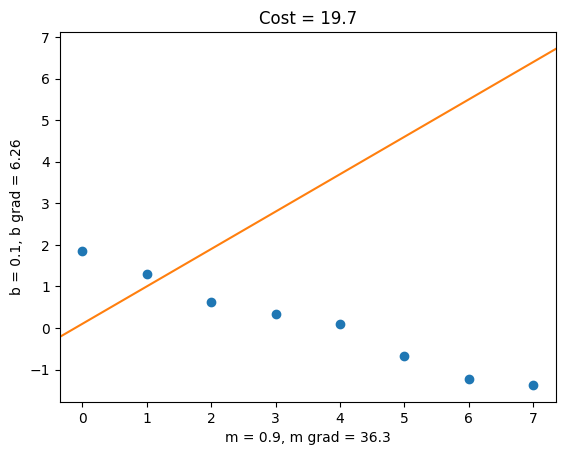

In [19]:
labeled_regression_plot(xs, ys, m, b, C)

Step 4: Gradient Descent

In [20]:
optimizer = torch.optim.SGD([m, b], lr=0.01)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
optimizer.step()

In [22]:
C = mse(regression(xs, m, b), ys)

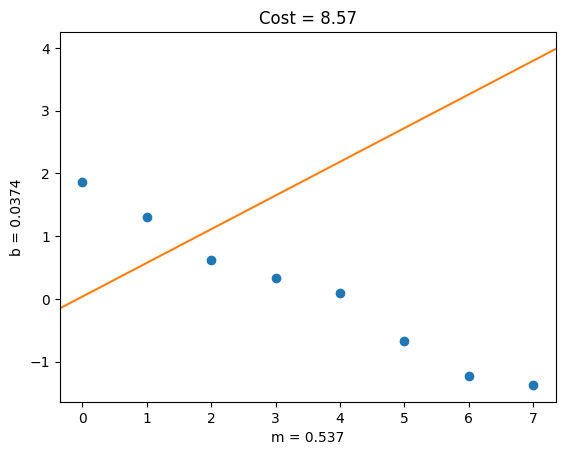

In [23]:
labeled_regression_plot(xs, ys, m, b, C, include_grad=False) # Gradient of C hasn't been recalculated

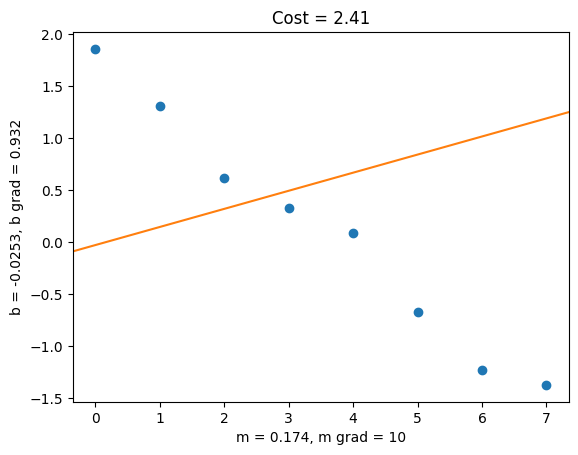

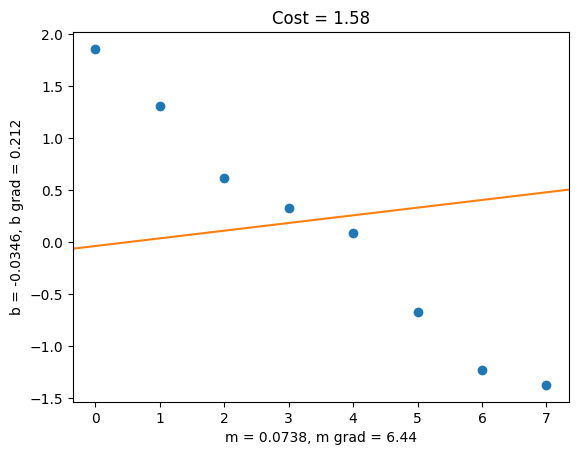

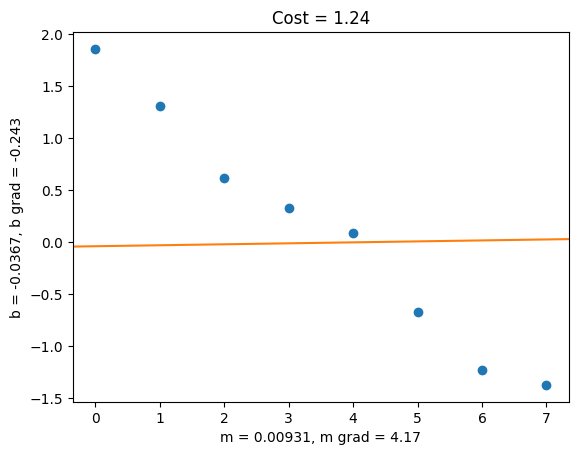

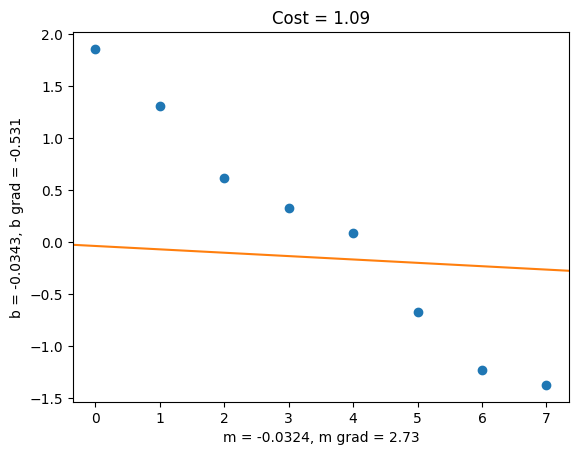

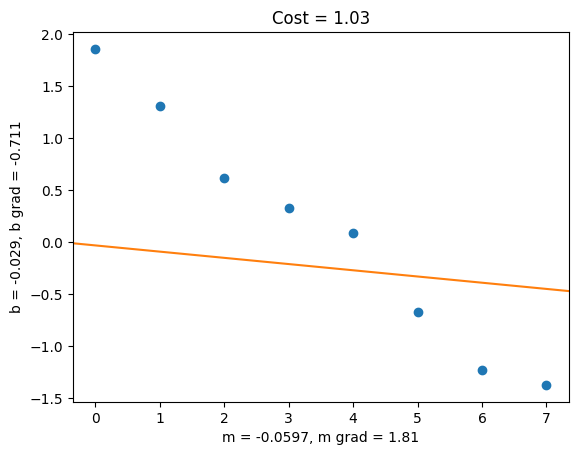

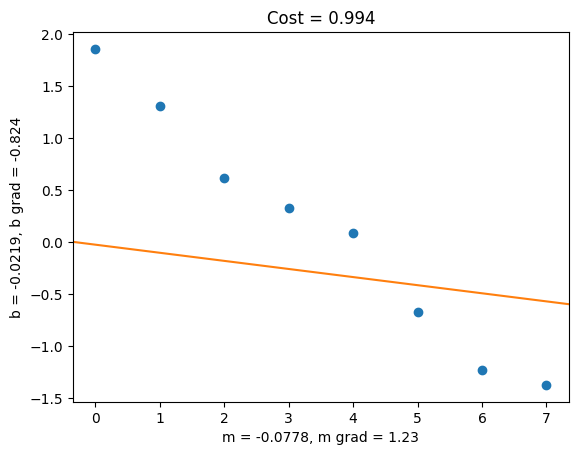

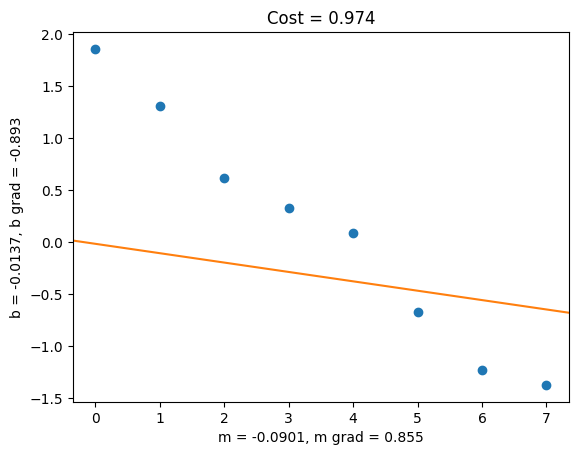

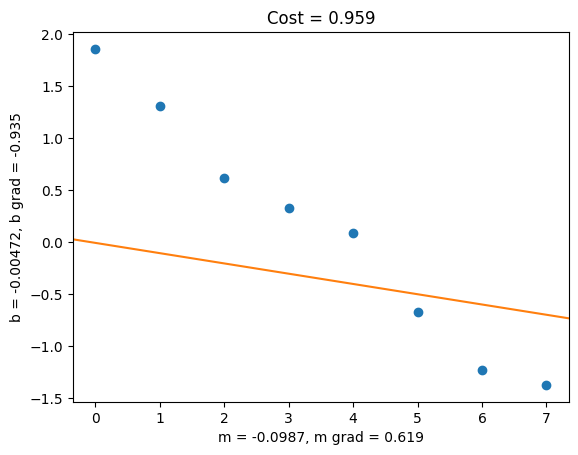

In [28]:
epochs = 8
for epoch in range(epochs): 
    
    optimizer.zero_grad() # Reset gradients to zero; else they accumulate
    
    yhats = regression(xs, m, b) # Step 1
    C = mse(yhats, ys) # Step 2
    
    C.backward() # Step 3
    
    labeled_regression_plot(xs, ys, m, b, C)
    
    optimizer.step() # Step 4